# ML101

In [61]:
import numpy as np # mathematics
import pandas as pd # data science
import matplotlib.pyplot as plt # plotting
import matplotlib
from IPython.display import display

matplotlib.rcParams['figure.figsize'] = (18,10)
matplotlib.rcParams.update({'font.size': 24})

# some functions
def computeCost(X, y, theta):
    m = y.size # number of training examples
    h = X.dot(theta) # hypothesis
    cost = sum(pow(h-y, 2)) / (2*m) # Mean squared error cost function
    return cost

def gradientDescent(X, y, theta, alpha, iterations):    
    m = y.size; # number of training examples
    computed_theta = theta

    costs = []
    for i in range(0, iterations):
        h = X.dot(computed_theta) # hypothesis
        
        # updates theta0 and theta1
        computed_theta[0] = computed_theta[0] - alpha * (1/m) * sum(h - y)
        computed_theta[1] = computed_theta[1] - alpha * (1/m) * sum((h - y) * X[:,1])
        costs.append(computeCost(X, y, computed_theta))
        
    return computed_theta, costs;

In [59]:
# step 1 - read data
data = pd.read_csv('./foodtruck.txt', header=None)
data.rename(columns={0: 'Population', 1:'Profit'}, inplace=True)
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
m = y.size
display(data)

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


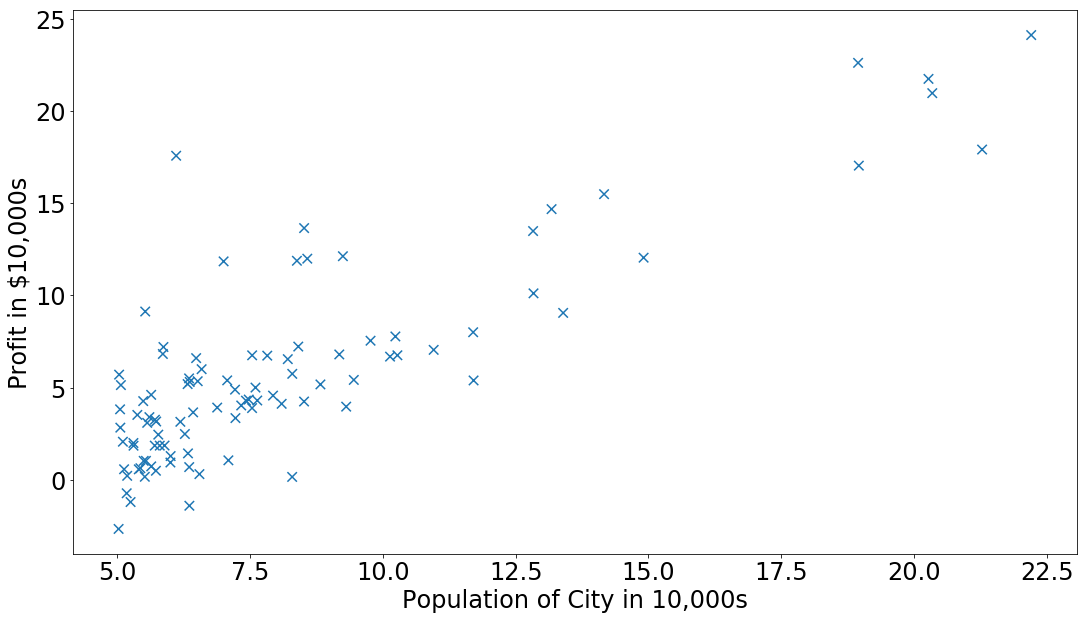

In [62]:
# step 2 - plot
plt.scatter(X, y, marker='x', s=[90]*X.shape[0])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [63]:
# step 3 - cost function
# add column of ones to X
X = np.concatenate((np.ones((m,1), dtype=np.int), X.reshape(m,1)), axis=1)

# compute initial cost
print('Testing the cost function with theta = [0 ; 0]')

J = computeCost(X, y, np.array([0, 0]))
print('Expected cost value (approx): 32.07')
print('Actual cost value: {}\n'.format(J))

print('Testing the cost function with theta = [-1 ; 2]')
J = computeCost(X, y, np.array([-1, 2]))
print('Expected cost value (approx): 54.24')
print('Actual cost value: {}\n'.format(J))

# run gradient descent
theta = np.zeros(2)
alpha = 0.01
iterations = 1500

print('Running Gradient Descent')
theta, costs = gradientDescent(X, y, theta, alpha, iterations)
print('Expected theta value (approx): [-3.6303, 1.1664]')
print('Actual theta value: {}\n'.format(theta))

Testing the cost function with theta = [0 ; 0]
Expected cost value (approx): 32.07
Actual cost value: 32.072733877455654

Testing the cost function with theta = [-1 ; 2]
Expected cost value (approx): 54.24
Actual cost value: 54.24245508201238

Running Gradient Descent
Expected theta value (approx): [-3.6303, 1.1664]
Actual theta value: [-3.63029144  1.16636235]



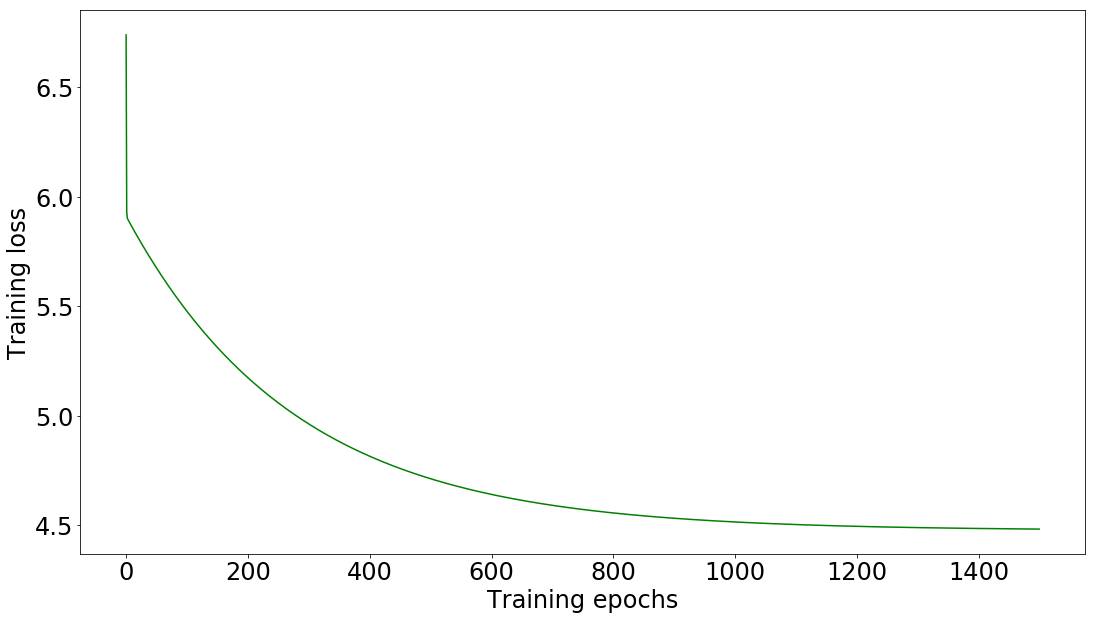

In [64]:
plt.plot(list(range(iterations)), costs, color='g', label='Cost')
plt.xlabel('Training epochs')
plt.ylabel('Training loss')
plt.show()

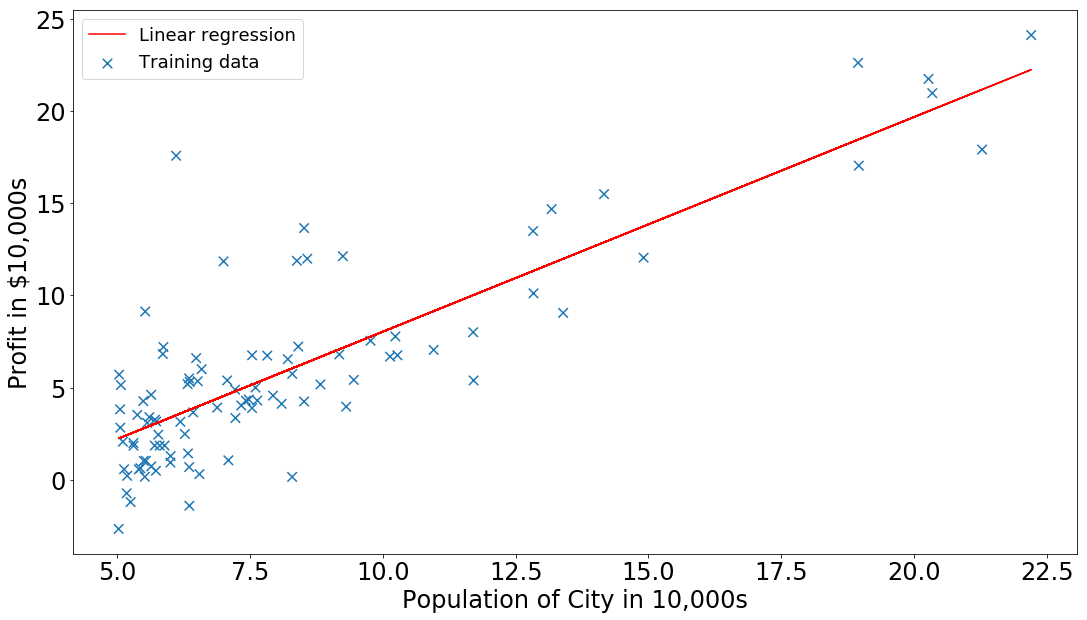

For population of 35,000 we predict a profit of 4519.7678677017675
For population of 70,000 we predict a profit of 45342.45012944714


In [65]:
# plot the linear fit
plt.scatter(X[:,1], y, marker='x', label='Training data', s=[90]*len(X))
plt.plot(X[:,1], X.dot(theta), color='r', label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(prop={'size': 18})
plt.show()

# predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print('For population of 35,000 we predict a profit of {}'.format(predict1 * 10000))
      
predict2 = np.array([1, 7]).dot(theta)
print('For population of 70,000 we predict a profit of {}'.format(predict2 * 10000))